<a href="https://colab.research.google.com/github/deep0505sharma/GAN-Data-Modellinng/blob/main/Copy_of_QCG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit


In [ ]:
!pip install pylatexenc

In [ ]:
!pip install qiskit-aqua[cplex]

In [ ]:
!pip3 install -e


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument


In [ ]:
from qiskit import *
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
import time
import matplotlib.pyplot as plt
from IPython import display
def hold(circuit, state, counts, fig1, fig2, fig3):
    circuit.draw(output='mpl', fold=100, ax=fig1.gca())
    plot_state_qsphere(state, ax=fig2.gca())
    plot_histogram(counts, ax=fig3.gca())
    display.display(fig1)
    display.display(fig2)
    display.display(fig3)
    display.clear_output(wait=True)
    time.sleep(2)

In [ ]:
import numpy as np
from qiskit.circuit.library import Diagonal
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, DensityMatrix, ScalarOp
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.converters import circuit_to_dag, dag_to_circuit

# Problem size: width and number of iterations
n = 5
steps = int(np.sqrt(2**n))

# Diagonal operators for mark and diffuse
mark_state = Statevector.from_label('11110')
mark_state2 = Statevector.from_label('11011')
diffuse_operator = 2 * DensityMatrix.from_label(n * '0') - Operator.from_label(n * 'I')
mark_circuit = Diagonal((-1)**mark_state.data)  # circuit that induces a -1 phase on the mark_state
mark_circuit = Diagonal((-1)**mark_state2.data)  # circuit that induces a -1 phase on the mark_state
diffuse_circuit = Diagonal(diffuse_operator.data.diagonal())  #  circuit that reflects about average = 2|0><0| - I

In [ ]:
# A single Grover's step: encode + reflect
mark_and_diffuse = QuantumCircuit(n)
all_qubits = mark_and_diffuse.qubits
mark_and_diffuse.append(mark_circuit, all_qubits)
mark_and_diffuse.h(all_qubits)
mark_and_diffuse.append(diffuse_circuit, all_qubits)
mark_and_diffuse.h(all_qubits)
print(mark_and_diffuse)

     ┌───────────┐┌───┐┌───────────┐┌───┐
q_0: ┤0          ├┤ H ├┤0          ├┤ H ├
     │           │├───┤│           │├───┤
q_1: ┤1          ├┤ H ├┤1          ├┤ H ├
     │           │├───┤│           │├───┤
q_2: ┤2 Diagonal ├┤ H ├┤2 Diagonal ├┤ H ├
     │           │├───┤│           │├───┤
q_3: ┤3          ├┤ H ├┤3          ├┤ H ├
     │           │├───┤│           │├───┤
q_4: ┤4          ├┤ H ├┤4          ├┤ H ├
     └───────────┘└───┘└───────────┘└───┘


In [ ]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution
job = backend.run(mark_and_diffuse)
result = job.result()
outputstate = result.get_statevector(mark_and_diffuse, decimals=3)
print(outputstate)

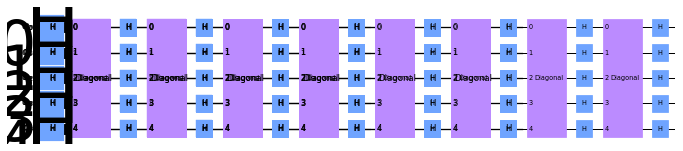

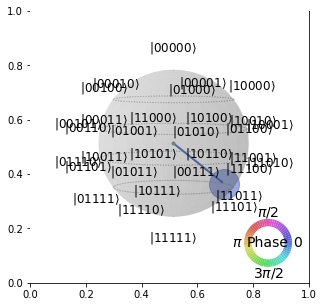

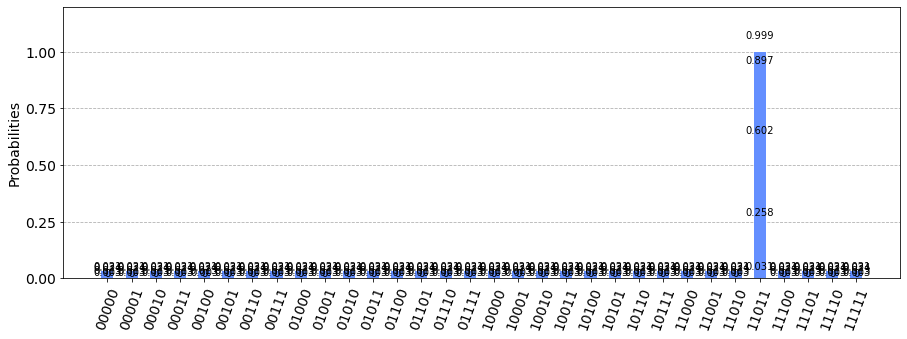

In [ ]:
%matplotlib inline

# Draw and update 3 figures: circuit, state, probabilities
fig1 = plt.figure(figsize=(12,5))
fig2 = plt.figure(figsize=(5,5))
fig3 = plt.figure(figsize=(15,5))

# Build and analyze incrementally
grover_circuit = QuantumCircuit(n)
all_qubits = grover_circuit.qubits

# First layer: Prepare uniform superposition
grover_circuit.h(all_qubits)
state = Statevector.from_label('+' * len(all_qubits))

# Keep iterating to amplify the correct amplitude
for step in range(steps):
    # visualize circuit, state, probabilities
    hold(grover_circuit, state.data, state.probabilities_dict(), fig1, fig2, fig3)

    # step circuit
    grover_circuit = grover_circuit.compose(mark_and_diffuse)

    # step state
    state = state.evolve(mark_and_diffuse)